In [1]:
import warnings
warnings.filterwarnings('ignore')
# For ignoring warnings printed by R magic commands

In [2]:
import os
import glob

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [4]:
# Load R magic
%load_ext rpy2.ipython
# Import ggplot2
%R require(ggplot2);

In [5]:
%%R 
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [6]:
directory = '../../../results/benchmarks/header-usage/'

In [7]:
df = pd.read_csv(directory + 'header_usage.csv')

In [8]:
df

,numHeaders,usage (bytes)
0,0,128
1,5,184
2,10,234
3,15,284
4,20,334
5,25,384
6,30,434


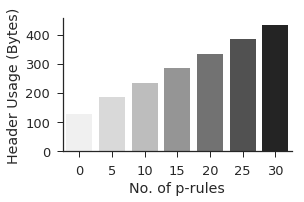

In [10]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='numHeaders', y='usage (bytes)', data=df, palette="Greys",
                   size=3, kind="bar", legend=True, legend_out=False, aspect=1.5, ci='sd')
ax.set(xlabel='No. of p-rules', ylabel='Header Usage (Bytes)')
plt.savefig('header-usage.pdf')
plt.show()

In [11]:
sdn_chip_header_size = 512

In [12]:
# substracting rest of the rows with first row
plot_df = pd.DataFrame()
plot_df['numHeaders'] = pd.Series(list(df[df['numHeaders'] != 0]['numHeaders']))
plot_df['usage (bytes)'] = pd.Series(list(df[df['numHeaders'] != 0]['usage (bytes)'])) - int(df[df['numHeaders'] == 0]['usage (bytes)'])
plot_df['%'] = plot_df['usage (bytes)'] / sdn_chip_header_size * 100

In [13]:
plot_df

,numHeaders,usage (bytes),%
0,5,56,10.937500
1,10,106,20.703125
2,15,156,30.468750
3,20,206,40.234375
4,25,256,50.000000
5,30,306,59.765625


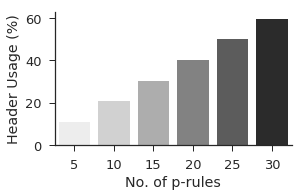

In [14]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='numHeaders', y='%', data=plot_df, palette="Greys",
                   size=3, kind="bar", legend=True, legend_out=False, aspect=1.5, ci='sd')
ax.set(xlabel='No. of p-rules', ylabel='Header Usage (%)')
plt.savefig('header-usage-percentage.pdf')
plt.show()